In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
import seaborn as sn
import plotly.express as px

In [3]:
ur_files = ddf.read_csv('EnvironmentSuicide/Environment_Suicide_2016.csv', dtype = {'fips': str})
climate_2016 = ur_files.compute()
climate_2016 = climate_2016.loc[:, ~climate_2016.columns.str.contains('^Unnamed')]
climate_2016.head()

,fips,county,elevation,mean_temp,visibility,wind_speed,precipitation,fog,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,humidity_temp_index,PM2.5,Ozone,rurality,SuicideDeathRate
0,01001,Autauga,75.264706,66.975137,9.537432,4.415574,0.130637,0.133880,0.415301,0.010929,0.0,0.163934,66.400347,66.493467,57.680384,10.4,0.0,3,25.263462
1,01003,Baldwin,12.427907,67.272131,NaN,NaN,0.164016,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,61.672347,7.2,0.0,4,20.137800
2,01005,Barbour,94.311111,67.619399,9.419945,3.202459,0.093918,0.095628,0.360656,0.000000,0.0,0.224044,64.581072,67.116649,57.243657,9.4,0.0,6,13.199926
3,01007,Bibb,162.637500,65.298087,9.443716,3.487432,0.102240,0.051913,0.336066,0.008197,0.0,0.150273,63.457280,64.510388,55.362993,10.0,1.0,2,13.033182
4,01009,Blount,243.931250,61.707104,NaN,4.025410,0.110628,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,55.549079,10.6,2.0,2,19.062803


In [4]:
climate_2016 = climate_2016[['fips', 'elevation', 'mean_temp', 'visibility', 'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail', 'thunder', 'Relative_Humidity', 'Heat_Index', 'humidity_temp_index','PM2.5', 'Ozone', 'rurality','SuicideDeathRate']]

In [5]:
climate_2016 = climate_2016.dropna()

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [7]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
X = climate_2016.iloc[:, 1:-1].values
y = climate_2016.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [9]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.24274523, 0.03044969, 0.04381674, 0.04712959, 0.06462899,
       0.03624791, 0.0280147 , 0.05214801, 0.00138226, 0.03992149,
       0.05697699, 0.08409377, 0.10462483, 0.1101468 , 0.01302604,
       0.04464696])

In [10]:
len(rf.feature_importances_)

16

In [11]:
columns = climate_2016.columns

In [12]:
columns = columns[1:-1]
columns = columns.tolist()
columns

['elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'Relative_Humidity',
 'Heat_Index',
 'humidity_temp_index',
 'PM2.5',
 'Ozone',
 'rurality']

In [13]:
len(columns)

16

Text(0.5, 0, 'Random Forest Feature Importance')

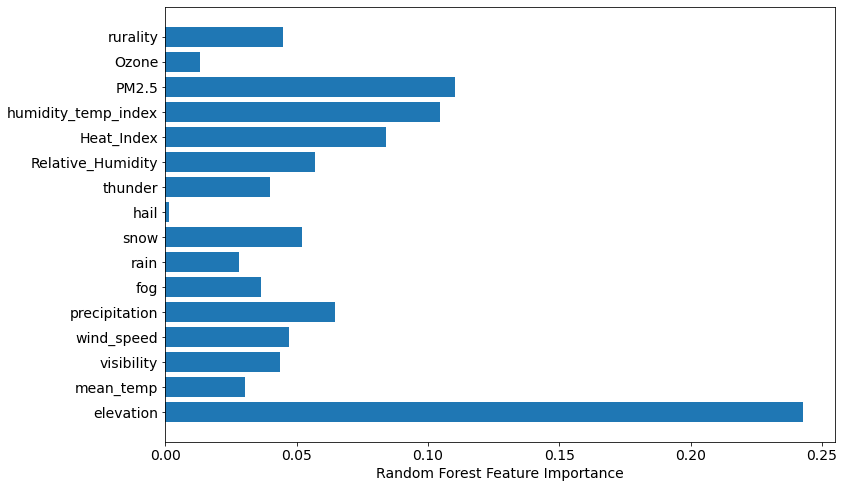

In [14]:
plt.barh(columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

In [15]:
sorted_idx = rf.feature_importances_.argsort()

In [16]:
sorted_idx

array([ 8, 14,  6,  1,  5,  9,  2, 15,  3,  7, 10,  4, 11, 12, 13,  0])

In [17]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

In [18]:
rf.feature_importances_[sorted_idx]

array([0.00138226, 0.01302604, 0.0280147 , 0.03044969, 0.03624791,
       0.03992149, 0.04381674, 0.04464696, 0.04712959, 0.05214801,
       0.05697699, 0.06462899, 0.08409377, 0.10462483, 0.1101468 ,
       0.24274523])

Text(0.5, 0, 'Random Forest Feature Importance')

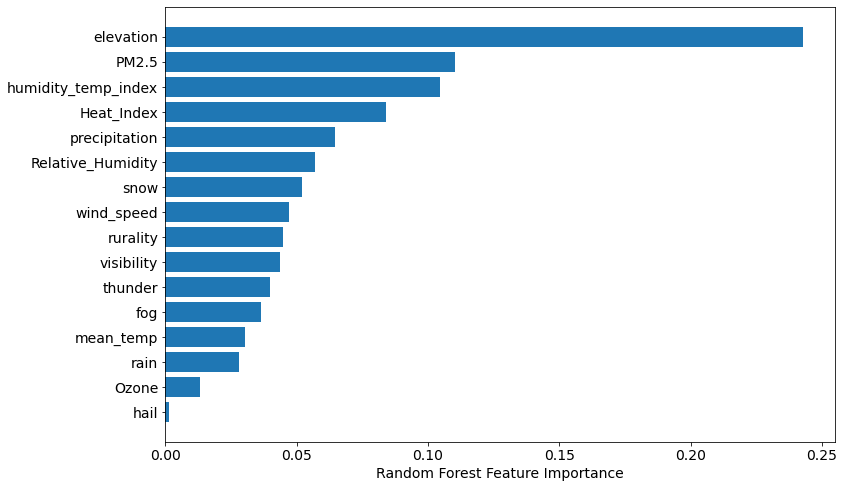

In [19]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [20]:
def correlation_matrix(df):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sn.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sn.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)

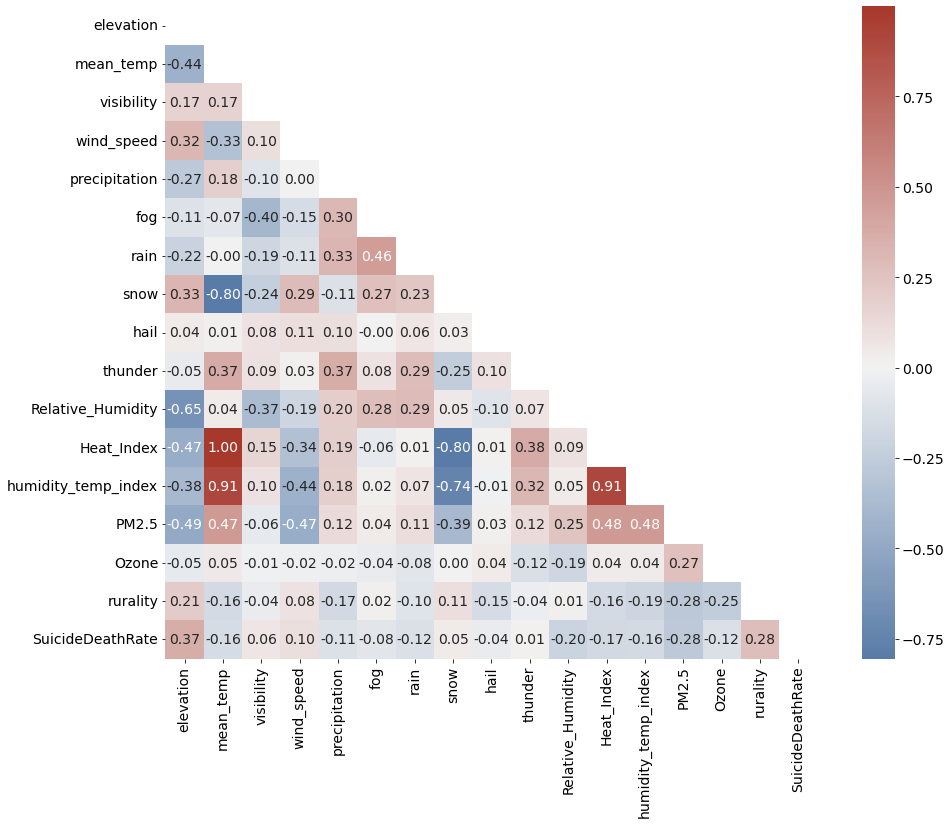

In [21]:
correlation_matrix(climate_2016)

## Find the economic feature importances

In [22]:
ur_files = ddf.read_csv('SocialEconomicSuicide/Social_Economic_Suicide_2016.csv', dtype = {'fips': str, 'per_capita_income': float})
social_2016 = ur_files.compute()
social_2016 = social_2016.loc[:, ~social_2016.columns.str.contains('^Unnamed')]
social_2016.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,29229,18502.0,0.252604,0.212146,0.161294,0.074510,0.265952,0.033130,0.014337,0.186582,0.025668,0.249592,0.044619,0.656262,0.010883,0.252250,"Wright County, MO",28.176951
1,29047,30531.0,0.090714,0.077548,0.017444,0.040412,0.159275,0.012581,0.107195,0.127566,0.057734,0.249461,0.175564,0.476880,0.011740,0.204632,"Clay County, MO",19.658281
2,29065,19929.0,0.223922,0.217152,0.216531,0.077093,0.275613,0.023094,0.006352,0.200860,0.019517,0.230582,0.049942,0.722837,0.013673,0.194747,"Dent County, MO",25.382447
3,29195,20446.0,0.171353,0.161301,0.064755,0.091520,0.219722,0.022311,0.048464,0.168217,0.087941,0.230680,0.187990,0.721574,0.059361,0.213958,"Saline County, MO",15.959954
4,29227,23292.0,0.130739,0.112000,0.063373,0.034896,0.151700,0.013086,0.035350,0.240660,0.011299,0.201359,0.037846,0.507472,0.027656,0.089157,"Worth County, MO",15.837110


In [23]:
social_2016['SuicideDeathRate'].isna().sum()

101

In [24]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
social_2016 = social_2016.dropna(how = 'any')

In [25]:
social_2016.shape

(3118, 18)

In [26]:
X = social_2016.iloc[:, 1:-2].values
y = social_2016.iloc[:, -1].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [28]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.04046294, 0.05022437, 0.08554165, 0.10671348, 0.07303519,
       0.10138984, 0.13510577, 0.03761262, 0.0632927 , 0.06784608,
       0.04800342, 0.06800851, 0.05245769, 0.03294511, 0.03736061])

In [29]:
len(rf.feature_importances_)

15

In [30]:
columns = social_2016.columns
columns = columns[1:-2]
columns = columns.tolist()
columns

['per_capita_income',
 'percent_below_poverty',
 'percent_no_highschool_diploma',
 'percent_mobile_homes',
 'percent_no_vehicle',
 'percent_unemployed_CDC',
 'percent_overcrowding',
 'percent_multi_unit_housing',
 'percent_age_65_and_older',
 'percent_limited_english_abilities',
 'percent_age_17_and_younger',
 'percent_minorities',
 'percent_disabled',
 'percent_institutionalized_in_group_quarters',
 'percent_single_parent_households_CDC']

In [31]:
social_2016.shape

(3118, 18)

In [32]:
climate_2016.shape

(2839, 18)

In [33]:
sorted_idx = rf.feature_importances_.argsort()

In [34]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

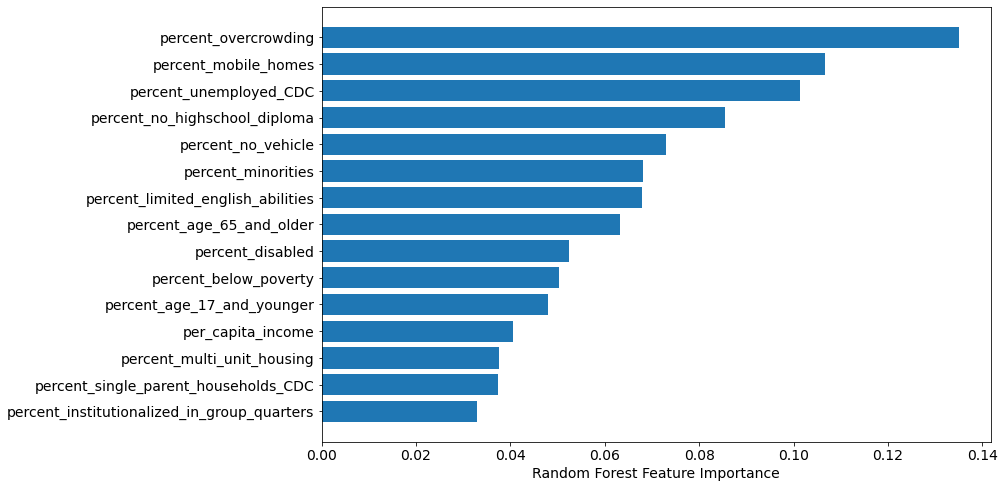

In [35]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

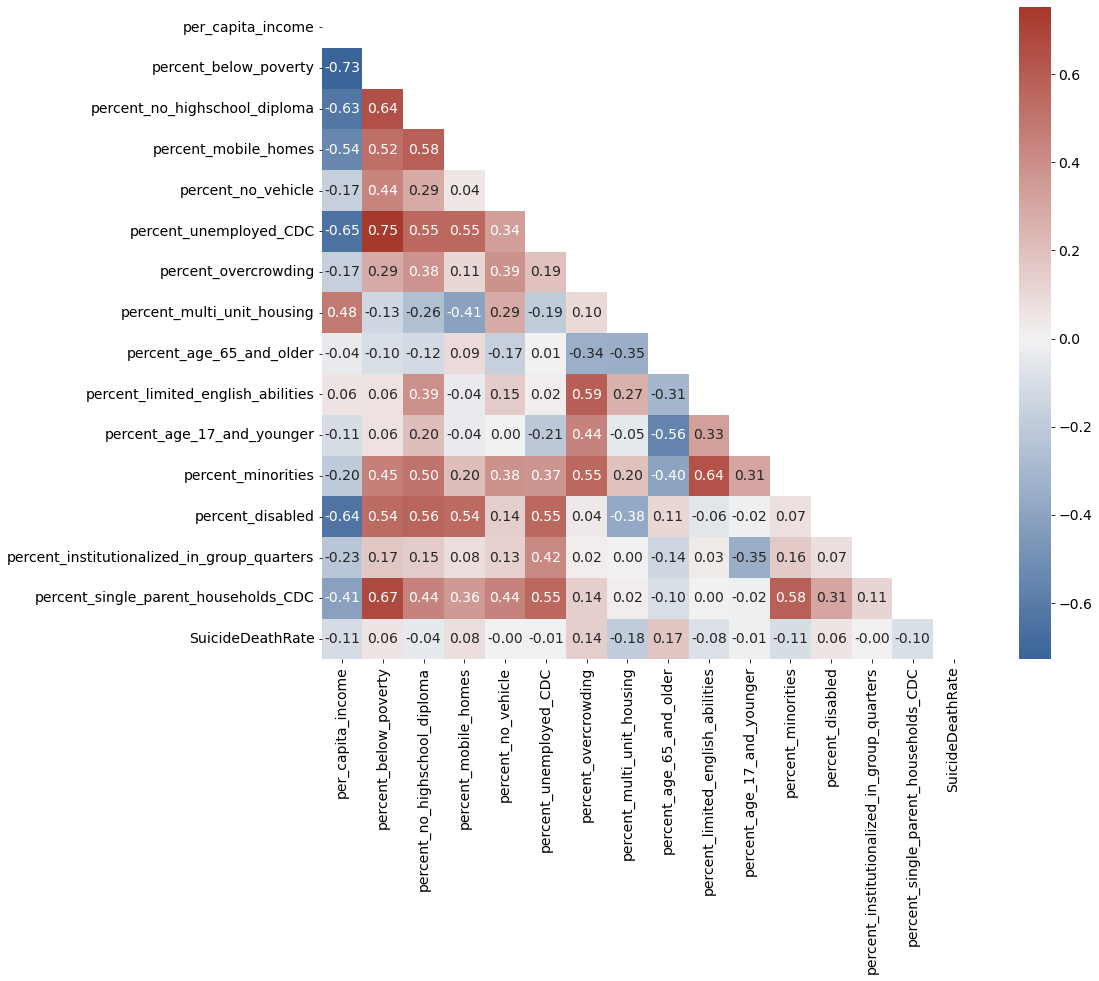

In [36]:
correlation_matrix(social_2016)

## find the rank of importances of all factors

In [37]:
df_total = social_2016.merge(climate_2016, on = ['fips', 'SuicideDeathRate'], how = 'left')
df_total = df_total.dropna(how = 'any')
df_total.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,...,rain,snow,hail,thunder,Relative_Humidity,Heat_Index,humidity_temp_index,PM2.5,Ozone,rurality
0,29229,18502.0,0.252604,0.212146,0.161294,0.074510,0.265952,0.033130,0.014337,0.186582,...,0.396175,0.046448,0.002732,0.122951,66.799486,56.498620,45.981912,8.1,0.0,6.0
1,29047,30531.0,0.090714,0.077548,0.017444,0.040412,0.159275,0.012581,0.107195,0.127566,...,0.297450,0.042493,0.000000,0.135977,67.510151,55.341447,45.869145,6.4,2.0,2.0
3,29195,20446.0,0.171353,0.161301,0.064755,0.091520,0.219722,0.022311,0.048464,0.168217,...,0.306011,0.046448,0.000000,0.117486,69.404770,58.167680,43.481553,7.6,0.0,5.0
4,29227,23292.0,0.130739,0.112000,0.063373,0.034896,0.151700,0.013086,0.035350,0.240660,...,0.297814,0.068306,0.000000,0.112022,71.832517,52.158451,43.272911,7.4,0.0,6.0
6,29141,19555.0,0.242446,0.230385,0.194917,0.087911,0.279330,0.012939,0.023224,0.234863,...,0.322404,0.046448,0.000000,0.120219,65.937531,57.537069,43.481553,7.9,0.0,6.0


In [38]:
col = df_total.columns.values

In [39]:
col

array(['fips', 'per_capita_income', 'percent_below_poverty',
       'percent_no_highschool_diploma', 'percent_mobile_homes',
       'percent_no_vehicle', 'percent_unemployed_CDC',
       'percent_overcrowding', 'percent_multi_unit_housing',
       'percent_age_65_and_older', 'percent_limited_english_abilities',
       'percent_age_17_and_younger', 'percent_minorities',
       'percent_disabled', 'percent_institutionalized_in_group_quarters',
       'percent_single_parent_households_CDC', 'county',
       'SuicideDeathRate', 'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'fog', 'rain', 'snow', 'hail',
       'thunder', 'Relative_Humidity', 'Heat_Index',
       'humidity_temp_index', 'PM2.5', 'Ozone', 'rurality'], dtype=object)

In [40]:
new_col = ['fips', 'county', 'percent_below_poverty',
       'per_capita_income', 'percent_unemployed_CDC',
       'percent_no_highschool_diploma', 'percent_age_65_and_older',
       'percent_age_17_and_younger', 'percent_disabled',
       'percent_single_parent_households_CDC', 'percent_minorities',
       'percent_limited_english_abilities', 'percent_multi_unit_housing',
       'percent_mobile_homes', 'percent_overcrowding',
       'percent_no_vehicle',
       'percent_institutionalized_in_group_quarters', 
       'elevation', 'mean_temp', 'visibility',
       'wind_speed', 'precipitation', 'Relative_Humidity', 'Heat_Index','humidity_temp_index',
       'fog', 'rain', 'snow', 'hail', 'thunder', 'PM2.5',
       'Ozone', 'rurality','SuicideDeathRate']

In [41]:
df_total = df_total[new_col]

In [42]:
df_total.shape

(2839, 34)

In [43]:
df_total.head()

,fips,county,percent_below_poverty,per_capita_income,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,...,humidity_temp_index,fog,rain,snow,hail,thunder,PM2.5,Ozone,rurality,SuicideDeathRate
0,29229,"Wright County, MO",0.252604,18502.0,0.265952,0.212146,0.186582,0.249592,0.656262,0.252250,...,45.981912,0.054645,0.396175,0.046448,0.002732,0.122951,8.1,0.0,6.0,28.176951
1,29047,"Clay County, MO",0.090714,30531.0,0.159275,0.077548,0.127566,0.249461,0.476880,0.204632,...,45.869145,0.028329,0.297450,0.042493,0.000000,0.135977,6.4,2.0,2.0,19.658281
3,29195,"Saline County, MO",0.171353,20446.0,0.219722,0.161301,0.168217,0.230680,0.721574,0.213958,...,43.481553,0.051913,0.306011,0.046448,0.000000,0.117486,7.6,0.0,5.0,15.959954
4,29227,"Worth County, MO",0.130739,23292.0,0.151700,0.112000,0.240660,0.201359,0.507472,0.089157,...,43.272911,0.084699,0.297814,0.068306,0.000000,0.112022,7.4,0.0,6.0,15.837110
6,29141,"Morgan County, MO",0.242446,19555.0,0.279330,0.230385,0.234863,0.220444,0.590787,0.166442,...,43.481553,0.046448,0.322404,0.046448,0.000000,0.120219,7.9,0.0,6.0,22.473425


In [44]:
plt.rcParams.update({'figure.figsize': (20.0, 12.0)})
plt.rcParams.update({'font.size': 14})
X = df_total.iloc[:, 2:-1].values
y = df_total.iloc[:, -1].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [46]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf.feature_importances_

array([0.03415215, 0.03305345, 0.0542684 , 0.0292601 , 0.02571942,
       0.02974852, 0.02924615, 0.01782353, 0.04115053, 0.07423975,
       0.01102444, 0.04653497, 0.01643575, 0.03810681, 0.01976291,
       0.1752967 , 0.01843388, 0.02133323, 0.0147627 , 0.02706316,
       0.02433979, 0.03073283, 0.05704295, 0.02081987, 0.01650754,
       0.01362232, 0.00032441, 0.01801198, 0.05408843, 0.00259544,
       0.00449787])

In [47]:
len(rf.feature_importances_)

31

In [48]:
columns = df_total.columns
columns = columns[2:-1]
columns = columns.tolist()
columns

['percent_below_poverty',
 'per_capita_income',
 'percent_unemployed_CDC',
 'percent_no_highschool_diploma',
 'percent_age_65_and_older',
 'percent_age_17_and_younger',
 'percent_disabled',
 'percent_single_parent_households_CDC',
 'percent_minorities',
 'percent_limited_english_abilities',
 'percent_multi_unit_housing',
 'percent_mobile_homes',
 'percent_overcrowding',
 'percent_no_vehicle',
 'percent_institutionalized_in_group_quarters',
 'elevation',
 'mean_temp',
 'visibility',
 'wind_speed',
 'precipitation',
 'Relative_Humidity',
 'Heat_Index',
 'humidity_temp_index',
 'fog',
 'rain',
 'snow',
 'hail',
 'thunder',
 'PM2.5',
 'Ozone',
 'rurality']

In [49]:
sorted_idx = rf.feature_importances_.argsort()

In [50]:
columns_sorted = []
for index in sorted_idx:
    columns_sorted.append(columns[index])

Text(0.5, 0, 'Random Forest Feature Importance')

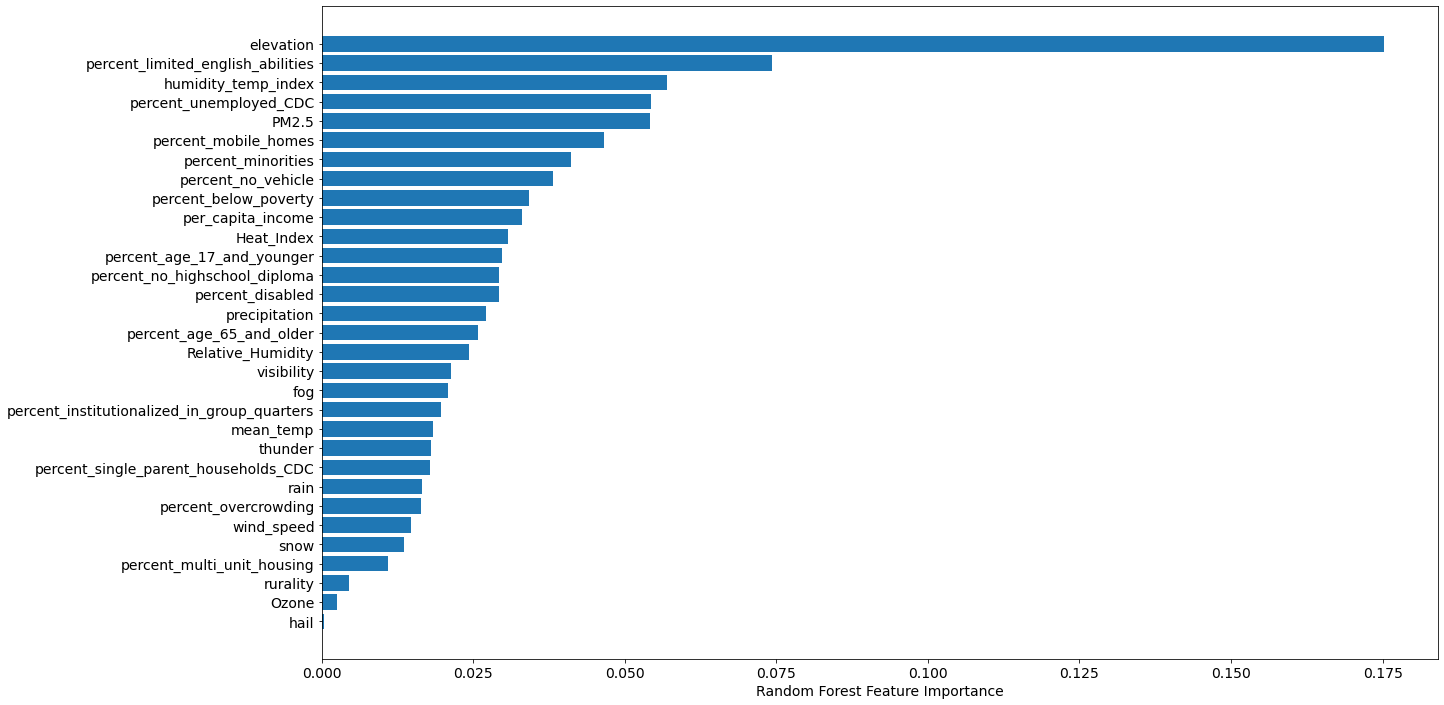

In [51]:
plt.barh(columns_sorted, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## SHAP

In [52]:
import xgboost
import shap

In [53]:
X = climate_2016.iloc[:, 1:-1]
y = climate_2016.iloc[:, -1].array

In [54]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


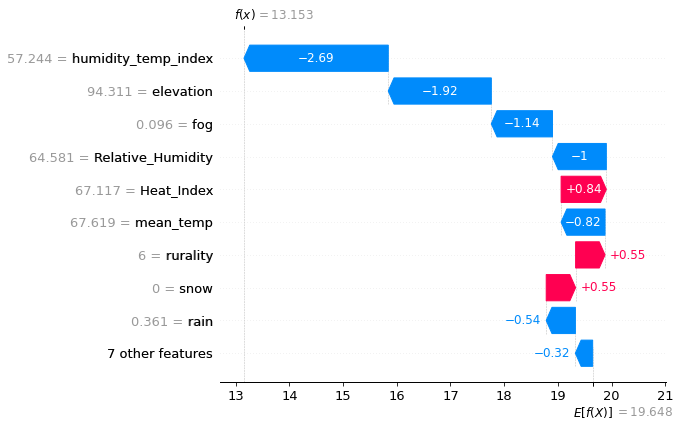

In [55]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

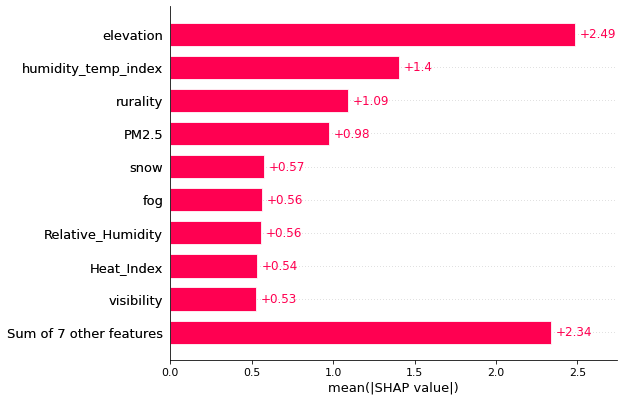

In [56]:
shap.plots.bar(shap_values)

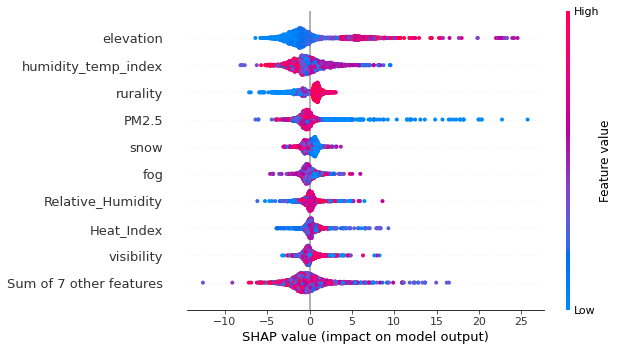

In [57]:
shap.plots.beeswarm(shap_values)

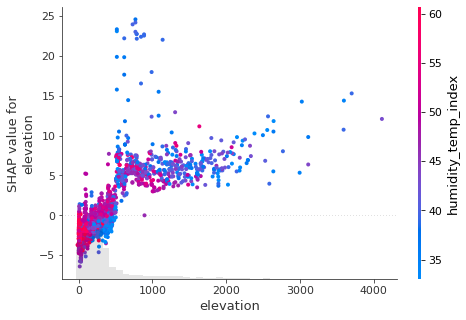

In [58]:
shap.plots.scatter(shap_values[:,"elevation"], color=shap_values)

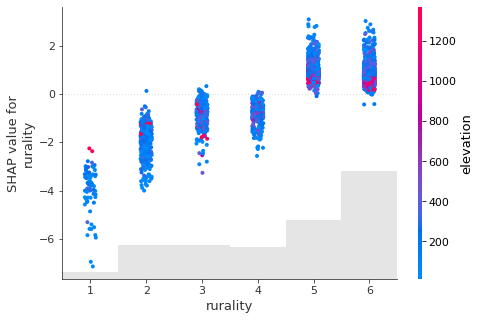

In [59]:
shap.plots.scatter(shap_values[:,"rurality"], color=shap_values)

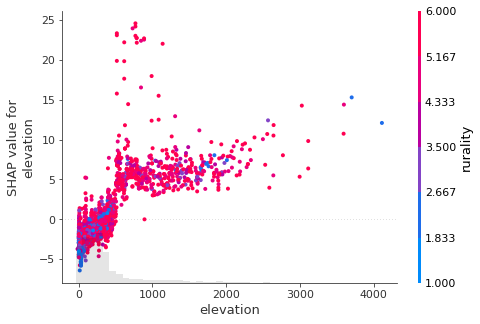

In [60]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

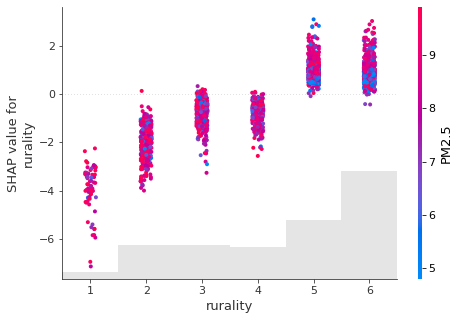

In [61]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"PM2.5"])

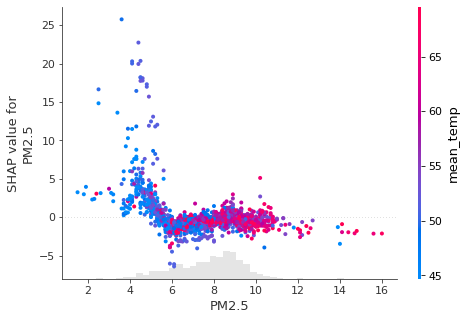

In [62]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"mean_temp"])

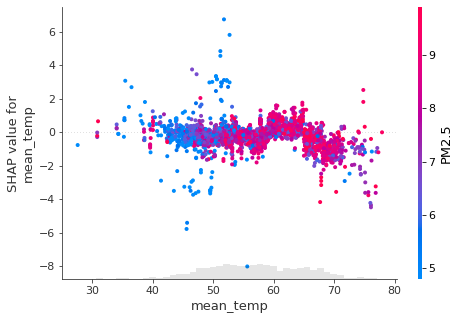

In [63]:
shap.plots.scatter(shap_values[:,"mean_temp"], color=shap_values)

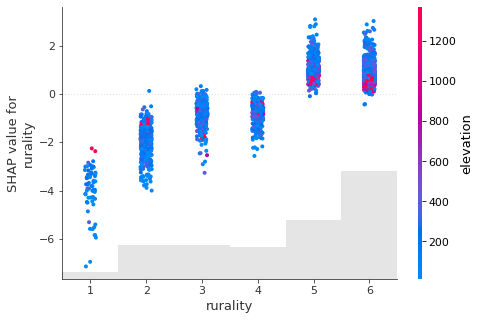

In [64]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"elevation"])

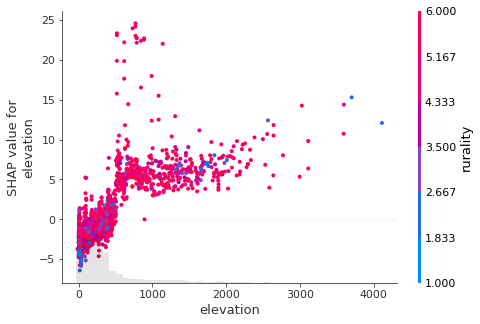

In [65]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"rurality"])

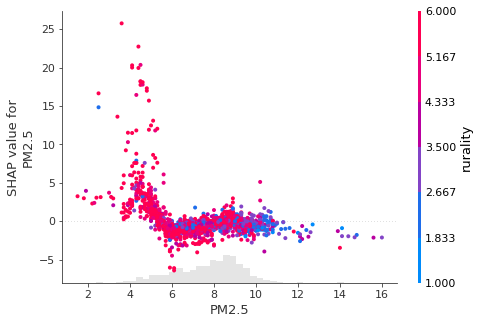

In [66]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"rurality"])

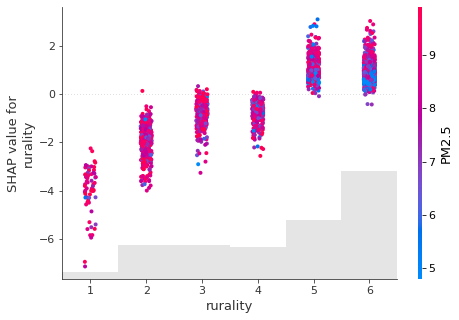

In [67]:
shap.plots.scatter(shap_values[:, "rurality"], color=shap_values[:,"PM2.5"])

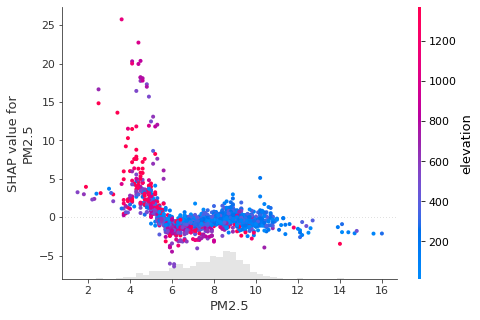

In [69]:
shap.plots.scatter(shap_values[:, "PM2.5"], color=shap_values[:,"elevation"])

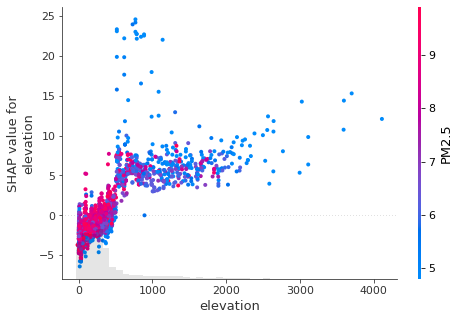

In [70]:
shap.plots.scatter(shap_values[:, "elevation"], color=shap_values[:,"PM2.5"])

### Social economic factors

In [61]:
social_2016.head()

,fips,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_mobile_homes,percent_no_vehicle,percent_unemployed_CDC,percent_overcrowding,percent_multi_unit_housing,percent_age_65_and_older,percent_limited_english_abilities,percent_age_17_and_younger,percent_minorities,percent_disabled,percent_institutionalized_in_group_quarters,percent_single_parent_households_CDC,county,SuicideDeathRate
0,29229,18502.0,0.252604,0.212146,0.161294,0.074510,0.265952,0.033130,0.014337,0.186582,0.025668,0.249592,0.044619,0.656262,0.010883,0.252250,"Wright County, MO",28.176951
1,29047,30531.0,0.090714,0.077548,0.017444,0.040412,0.159275,0.012581,0.107195,0.127566,0.057734,0.249461,0.175564,0.476880,0.011740,0.204632,"Clay County, MO",19.658281
2,29065,19929.0,0.223922,0.217152,0.216531,0.077093,0.275613,0.023094,0.006352,0.200860,0.019517,0.230582,0.049942,0.722837,0.013673,0.194747,"Dent County, MO",25.382447
3,29195,20446.0,0.171353,0.161301,0.064755,0.091520,0.219722,0.022311,0.048464,0.168217,0.087941,0.230680,0.187990,0.721574,0.059361,0.213958,"Saline County, MO",15.959954
4,29227,23292.0,0.130739,0.112000,0.063373,0.034896,0.151700,0.013086,0.035350,0.240660,0.011299,0.201359,0.037846,0.507472,0.027656,0.089157,"Worth County, MO",15.837110


In [62]:
X = social_2016.iloc[:, 1:-2]
y = social_2016.iloc[:, -1].array

In [63]:
model = xgboost.XGBRegressor().fit(X, y)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


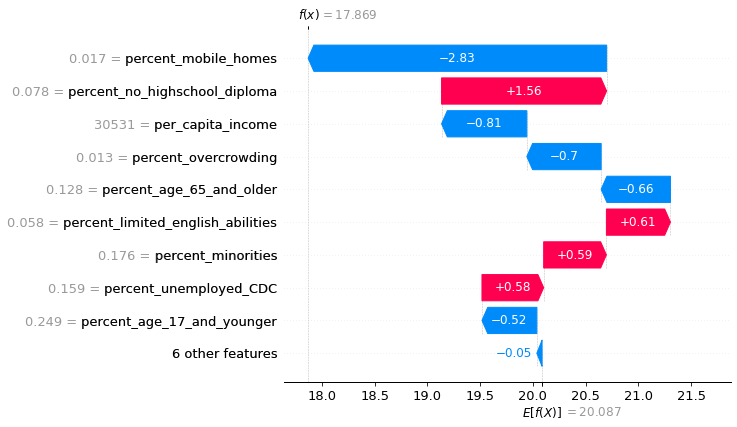

In [64]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

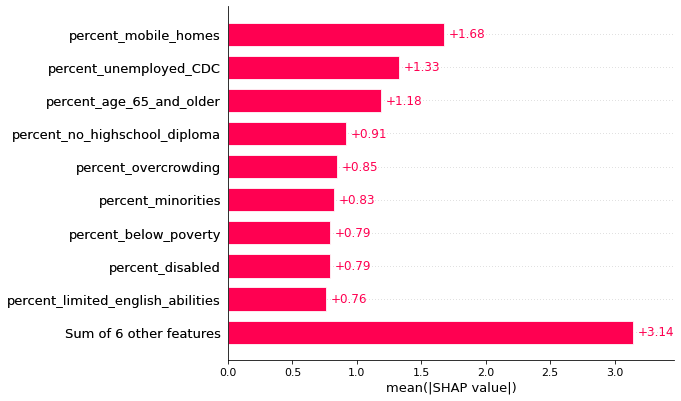

In [65]:
shap.plots.bar(shap_values)

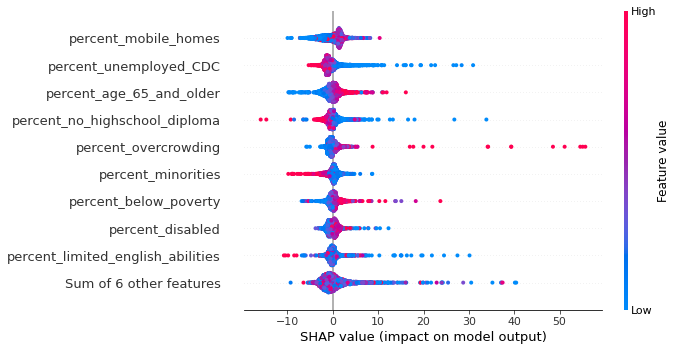

In [66]:
shap.plots.beeswarm(shap_values)

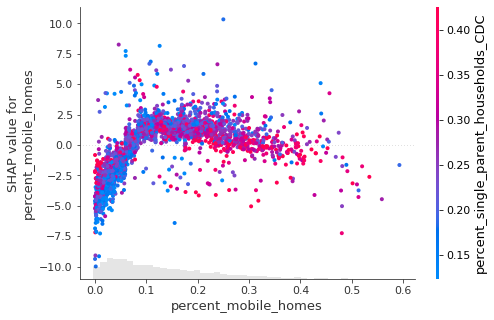

In [67]:
shap.plots.scatter(shap_values[:,"percent_mobile_homes"], color=shap_values)